#### Import libraries and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
# Datasets used
df_air_quality  = pd.read_csv("stations_daily.csv")
df_station_locations = pd.read_csv("stations_rsinaica.csv")

In [3]:
# Dataset with the relevant metrics for the analysis
print(df_air_quality.head())

     datetime  station_id     PM2.5      PM10       NOx        O3        CO  \
0  2015-04-02          32       NaN       NaN       NaN       NaN       NaN   
1  2015-05-21          32  0.454967  0.347400  0.059194  0.029176       NaN   
2  2015-05-22          32  0.077821  0.389323  0.019158  0.051903       NaN   
3  2015-05-23          32  0.018036  0.387729  0.019711  0.021092  0.144603   
4  2015-05-24          32  0.024935  0.398042  0.024757  0.009568  0.494143   

          HR        NO       NO2  ...  HCT  HRI  IUV          PB        PP  \
0        NaN       NaN       NaN  ...  NaN  NaN  NaN         NaN       NaN   
1  44.879091  0.029525  0.053121  ...  NaN  NaN  NaN  570.775455  0.296364   
2  42.506000  0.009589  0.014215  ...  NaN  NaN  NaN  558.360000  0.002750   
3  54.734437  0.009863  0.013436  ...  NaN  NaN  NaN  573.282187  0.038750   
4  58.374574  0.012397  0.010337  ...  NaN  NaN  NaN  572.169574  0.003404   

   PST          RS       TMPI  UVA  XIL  
0  NaN        

In [4]:
# Dataset containing the station name and station location
print(df_station_locations.head())

   station_id              station_name station_code  network_id network_name  \
0         397  CENICA 1, UAM Iztapalapa          CEN         144          NaN   
1         344       C. Salud Tlaxcoapán          TCP         127          NaN   
2         365                Costa Baja           UM         140          NaN   
3         393   Unidad Móvil de Hidalgo         UMHI         143          NaN   
4         394   Unidad Móvil Iztapalapa         UMIZ         143          NaN   

  network_code street  ext interior colonia  ... date_validated2  \
0        ESTSP    NaN  NaN      NaN     NaN  ...             NaN   
1          TCP    NaN  NaN      NaN     NaN  ...             NaN   
2          LAP    NaN  NaN      NaN     NaN  ...             NaN   
3          POP    NaN  NaN      NaN     NaN  ...             NaN   
4          POP    NaN  NaN      NaN     NaN  ...             NaN   

   passed_validation  video        lat        lon date_started  \
0                NaN    NaN  19.489583

In [5]:
# Merge both datasets using 'station_id'
df_combined = pd.merge(df_air_quality, df_station_locations, on='station_id', how='left')

In [6]:
# Check the first rows of the combined dataframe
print(df_combined.head())

     datetime  station_id     PM2.5      PM10       NOx        O3        CO  \
0  2015-04-02          32       NaN       NaN       NaN       NaN       NaN   
1  2015-05-21          32  0.454967  0.347400  0.059194  0.029176       NaN   
2  2015-05-22          32  0.077821  0.389323  0.019158  0.051903       NaN   
3  2015-05-23          32  0.018036  0.387729  0.019711  0.021092  0.144603   
4  2015-05-24          32  0.024935  0.398042  0.024757  0.009568  0.494143   

          HR        NO       NO2  ...  date_validated2  passed_validation  \
0        NaN       NaN       NaN  ...              NaN                NaN   
1  44.879091  0.029525  0.053121  ...              NaN                NaN   
2  42.506000  0.009589  0.014215  ...              NaN                NaN   
3  54.734437  0.009863  0.013436  ...              NaN                NaN   
4  58.374574  0.012397  0.010337  ...              NaN                NaN   

                                       video        lat       

In [7]:
# View the column names of the combined dataframe
df_combined.columns

Index(['datetime', 'station_id', 'PM2.5', 'PM10', 'NOx', 'O3', 'CO', 'HR',
       'NO', 'NO2', 'TMP', 'BEN', 'CH4', 'CN', 'CO2', 'H2S', 'HCNM', 'HCT',
       'HRI', 'IUV', 'PB', 'PP', 'PST', 'RS', 'TMPI', 'UVA', 'XIL',
       'station_name', 'station_code', 'network_id', 'network_name',
       'network_code', 'street', 'ext', 'interior', 'colonia', 'zip',
       'state_code', 'municipio_code', 'year_started', 'altitude', 'address',
       'date_validated', 'date_validated2', 'passed_validation', 'video',
       'lat', 'lon', 'date_started', 'timezone', 'street_view',
       'video_interior', 'color'],
      dtype='object')

In [8]:
# Select the relevant columns
columns_to_keep = ['datetime', 'station_id', 'PM2.5', 'PM10', 'NOx', 'O3', 'CO', 'NO', 
                   'NO2', 'TMP', 'HR', 'PB', 'lat', 'lon', 'network_id','network_name']
df_relevant = df_combined[columns_to_keep]
# Display the resulting dataframe
print(df_relevant.head())

     datetime  station_id     PM2.5      PM10       NOx        O3        CO  \
0  2015-04-02          32       NaN       NaN       NaN       NaN       NaN   
1  2015-05-21          32  0.454967  0.347400  0.059194  0.029176       NaN   
2  2015-05-22          32  0.077821  0.389323  0.019158  0.051903       NaN   
3  2015-05-23          32  0.018036  0.387729  0.019711  0.021092  0.144603   
4  2015-05-24          32  0.024935  0.398042  0.024757  0.009568  0.494143   

         NO       NO2        TMP         HR          PB        lat  \
0       NaN       NaN        NaN        NaN         NaN  21.846392   
1  0.029525  0.053121  23.440000  44.879091  570.775455  21.846392   
2  0.009589  0.014215  24.617275  42.506000  558.360000  21.846392   
3  0.009863  0.013436  22.366937  54.734437  573.282187  21.846392   
4  0.012397  0.010337  21.826915  58.374574  572.169574  21.846392   

          lon  network_id    network_name  
0 -102.288431          30  Aguascalientes  
1 -102.288431   

#### Data Cleaning and Outliers

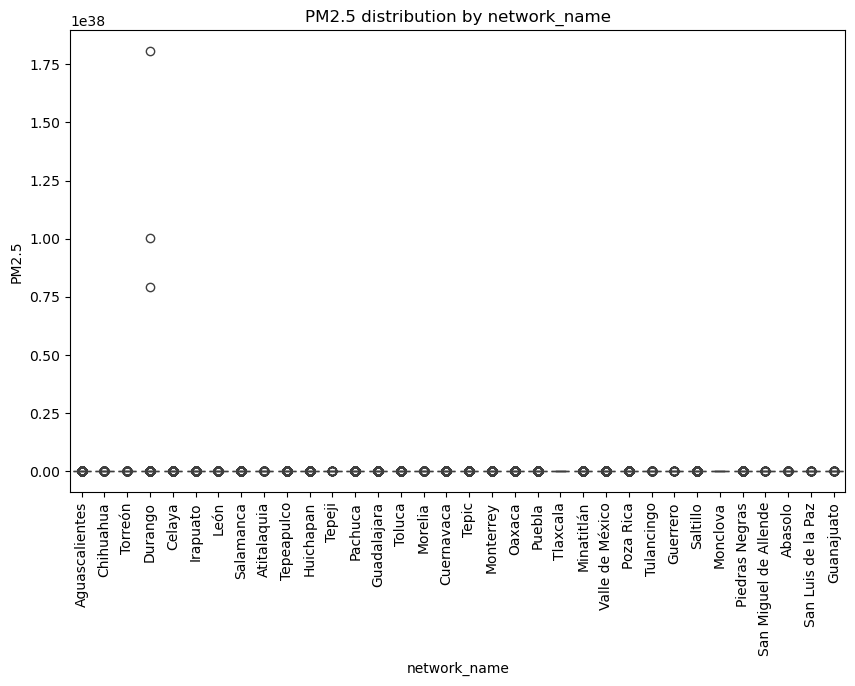

In [9]:
# Exploratory charts
plt.figure(figsize=(10, 6))
sns.boxplot(x="network_name", y="PM2.5", data=df_relevant)
plt.title("PM2.5 distribution by network_name")
# Rotate X-axis labels to make them more readable
plt.xticks(rotation=90)
plt.show()

In [10]:
# There are extremely large values in at least the PM2.5 column. Data cleaning will be necessary.
# Calculate the average PM2.5
print(f"The average PM2.5 in the dataset is: {df_relevant['PM2.5'].mean():.2f}")

The average PM2.5 in the dataset is: 2226160032900840052658061954777088.00


In [11]:
# View the minimum and maximum PM2.5 values
print(f"The minimum PM2.5 value is: {df_relevant['PM2.5'].min()}")
print(f"The maximum PM2.5 value is: {df_relevant['PM2.5'].max()}")

The minimum PM2.5 value is: 0.0
The maximum PM2.5 value is: 1.80616e+38


In [12]:
# Set a reasonable upper limit for the relevant variables
# Set a reasonable upper limit for the relevant variables
# Filter the DataFrame to exclude extremely large values
# Define reasonable limits for each pollutant
df_cleaned = df_relevant
limits = {
    'PM2.5': 500, # µg/m³
    'PM10': 500,  # µg/m³
    'NOx': 1000,  # µg/m³
    'O3': 600,    # µg/m³
    'CO': 100,    # mg/m³
    'NO': 500,    # µg/m³
    'TMP': 600,   # °C
    'HR': 100,    # %
    'PB': 1500    # mmHg
}
# Clean the dataset
for col, max_value in limits.items():
    df_cleaned = df_cleaned[(df_cleaned[col] >= 0) & (df_cleaned[col] < max_value)]

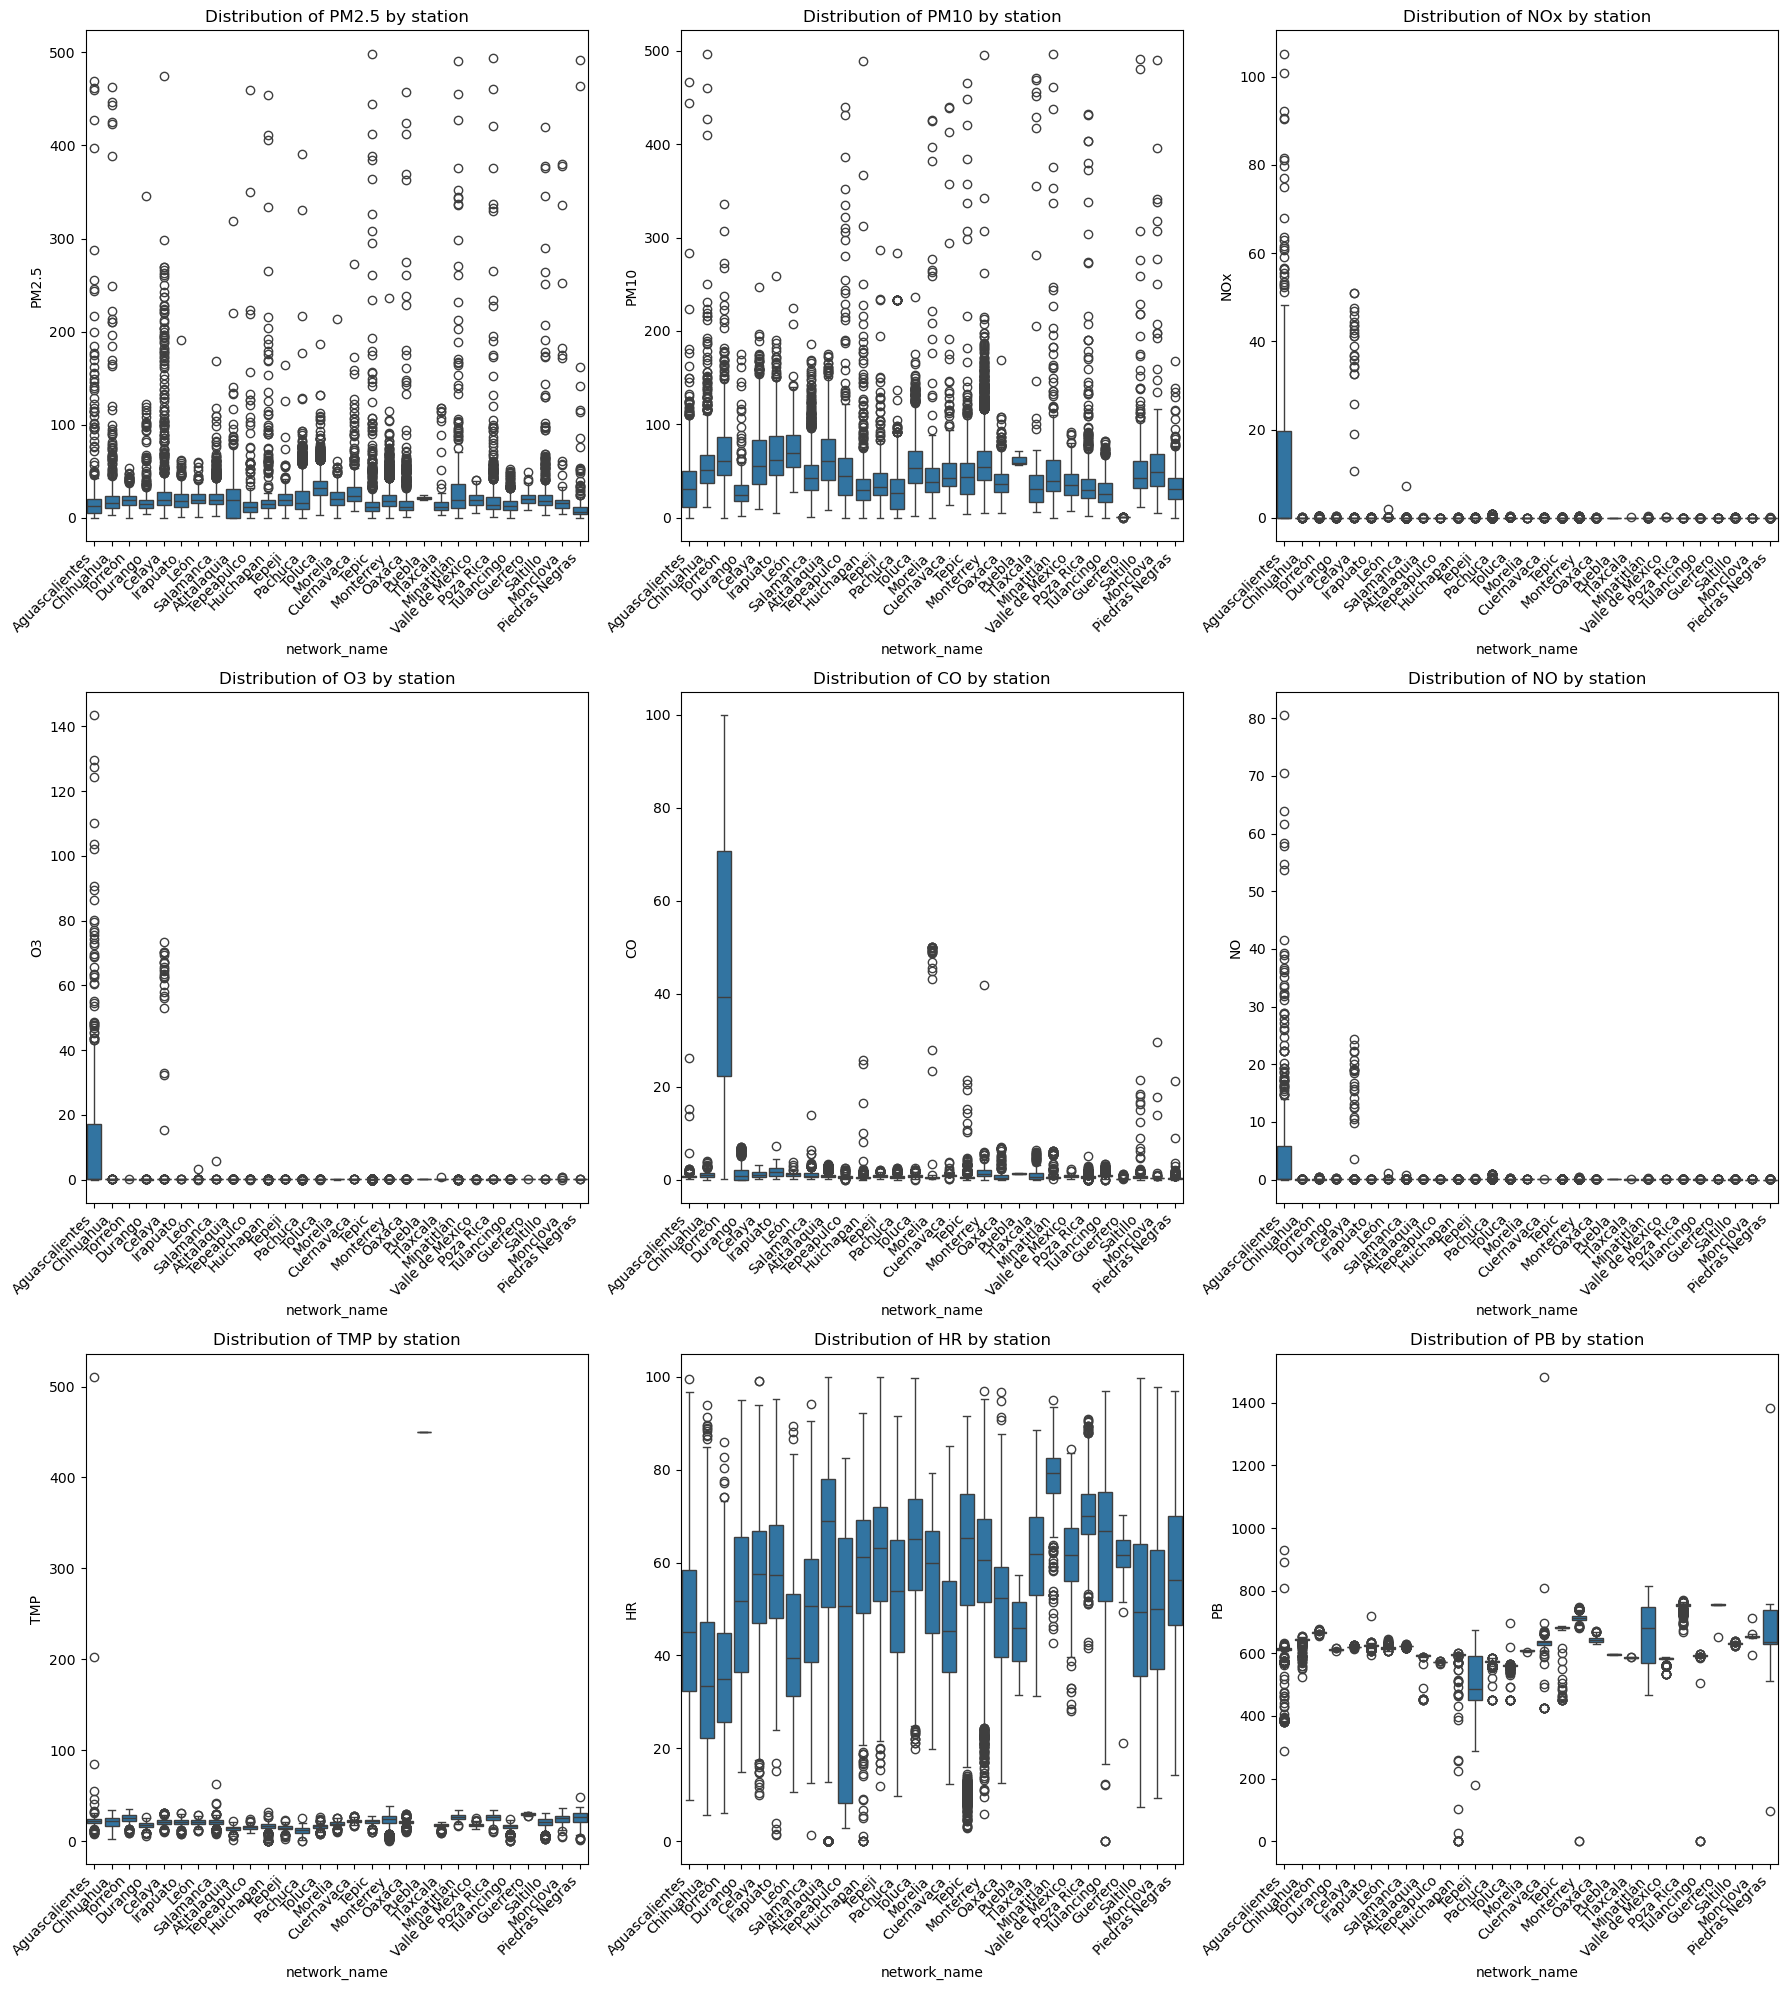

In [13]:
# Variables to plot
variables = ['PM2.5', 'PM10', 'NOx', 'O3', 'CO', 'NO', 'TMP', 'HR', 'PB']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 20))  # 3 rows, 3 columns

# Iterate over the variables and subplot positions
for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(data=df_cleaned, x="network_name", y=var, ax=ax)
    ax.set_title(f"Distribution of {var} by station")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate X-axis labels

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [14]:
# Check current ranges
for col in variables:
    print(f"{col}: min = {df_cleaned[col].min()}, max = {df_cleaned[col].max()}")

# Verify the amount of data per city
print(df_cleaned['network_name'].value_counts())

PM2.5: min = 0.0, max = 498.7083333333333
PM10: min = 0.0, max = 496.92083333333335
NOx: min = 0.0, max = 105.21530434782608
O3: min = 0.0, max = 143.4545652173913
CO: min = 0.0, max = 99.89016666666669
NO: min = 0.0, max = 80.53048260869565
TMP: min = 0.0, max = 510.5801666666667
HR: min = 0.0, max = 99.96838342864584
PB: min = 0.0, max = 1482.8535555555557
network_name
Monterrey          6372
Toluca             4687
Tepic              3350
Pachuca            2995
Salamanca          2933
Tulancingo         1782
Oaxaca             1759
Chihuahua          1494
Celaya             1389
Atitalaquia        1270
Huichapan          1256
Poza Rica          1086
Saltillo            987
Tepeji              964
Aguascalientes      778
Torreón             737
Irapuato            591
Minatitlán          525
Piedras Negras      474
Durango             455
Tepeapulco          411
León                369
Valle de México     363
Morelia             317
Cuernavaca          252
Monclova            205
Tl

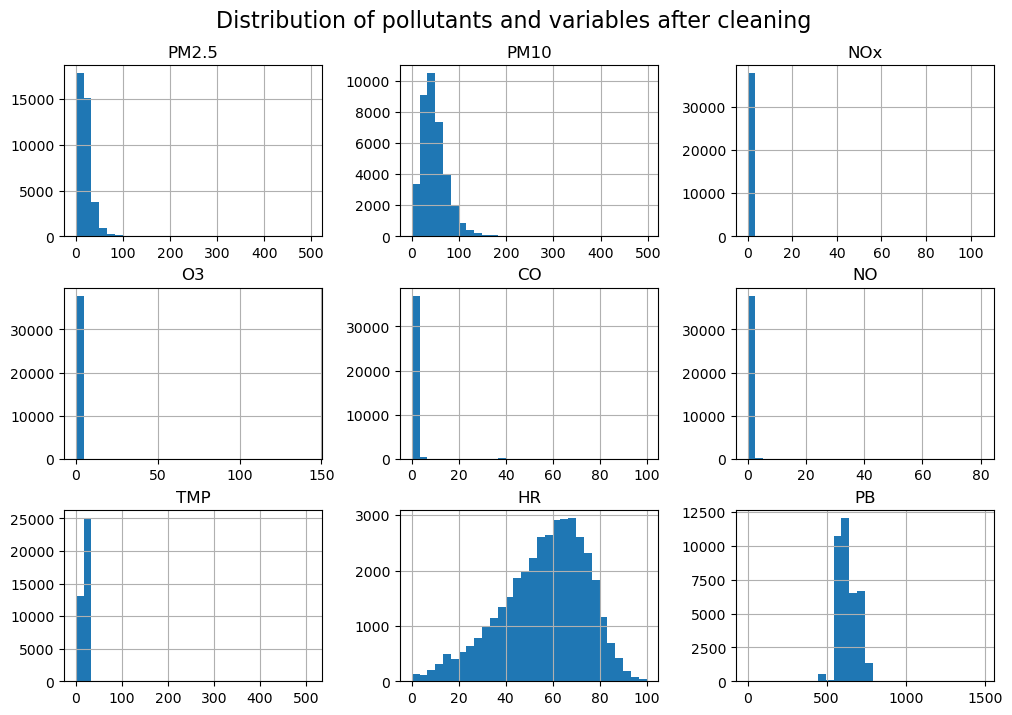

In [15]:
df_cleaned[variables].hist(figsize=(12, 8), bins=30)
plt.suptitle('Distribution of pollutants and variables after cleaning', y=0.95, fontsize=16)
plt.show()

#### Data Analysis

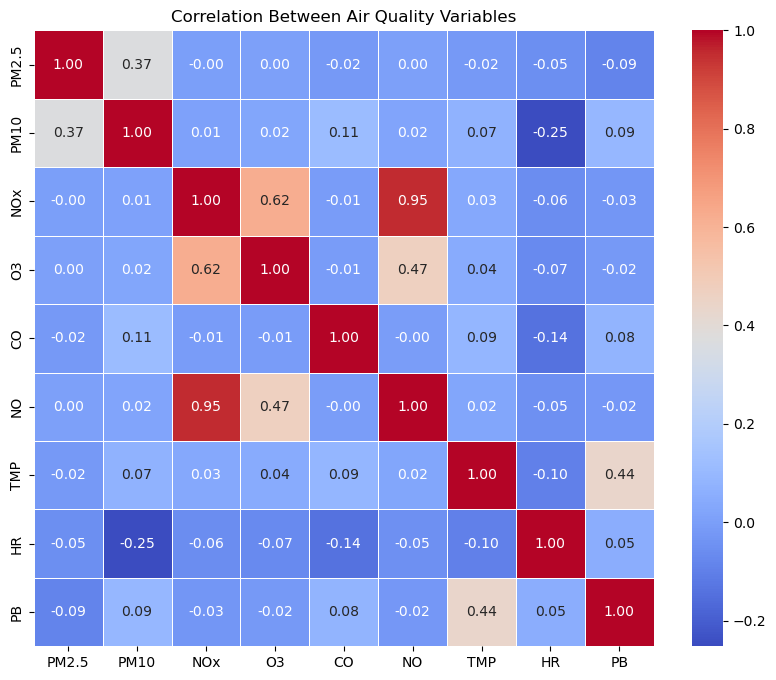

In [16]:
# Check the correlation between different variables to understand which ones interact the most with each other
# Calculate the correlation matrix
corr_matrix = df_cleaned[variables].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Air Quality Variables')
plt.show()

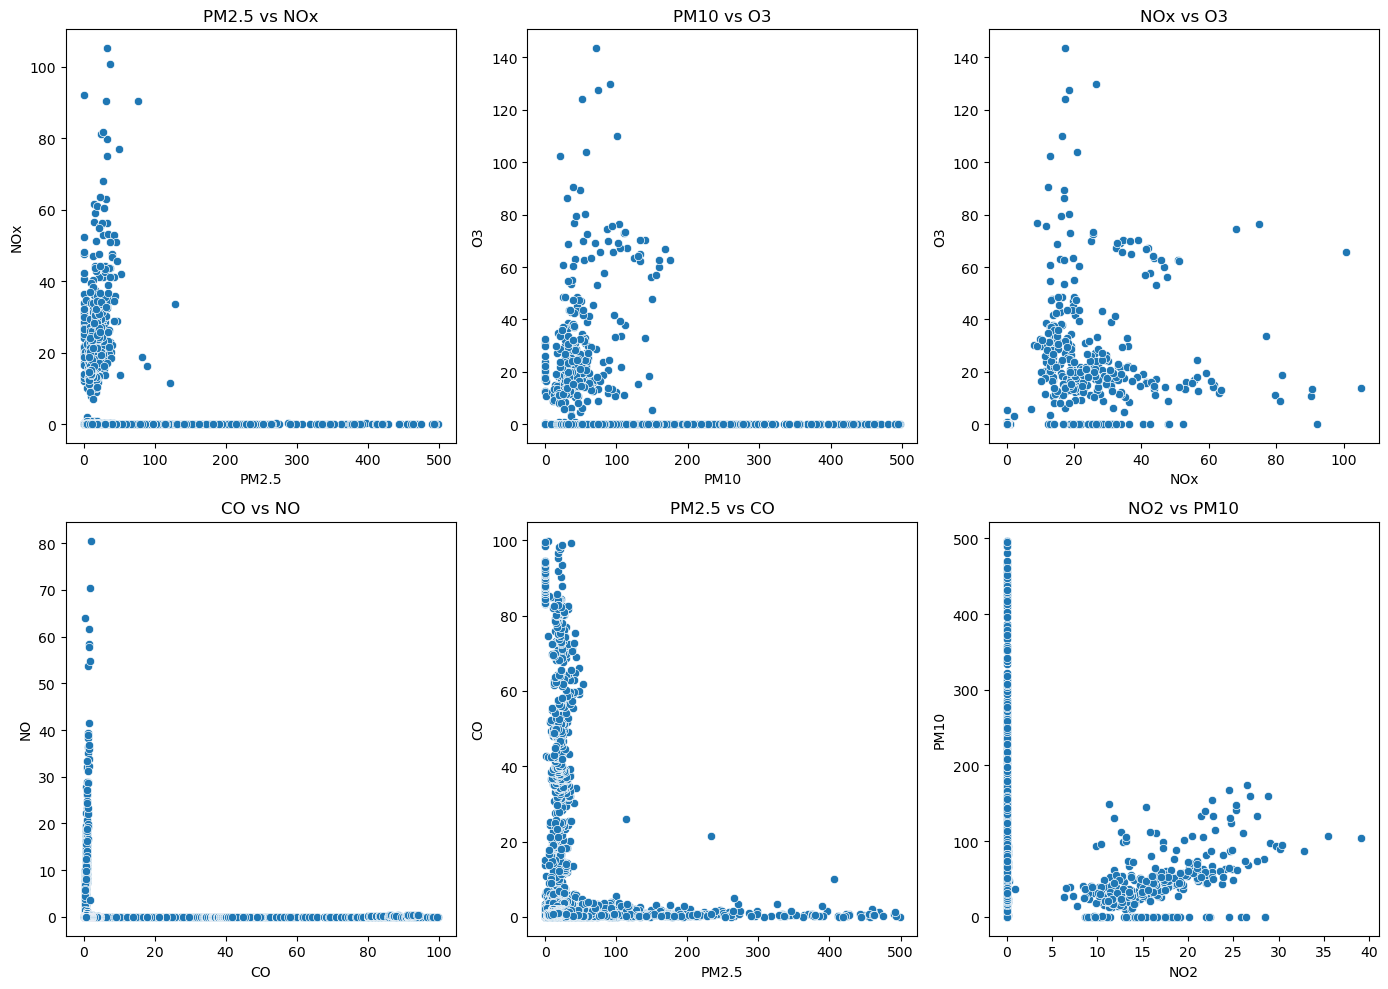

In [17]:
# Create scatter plots for some variable combinations
plt.figure(figsize=(14, 10))

# PM2.5 vs NOx
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, plot 1
sns.scatterplot(x='PM2.5', y='NOx', data=df_cleaned)
plt.title('PM2.5 vs NOx')

# PM10 vs O3
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, plot 2
sns.scatterplot(x='PM10', y='O3', data=df_cleaned)
plt.title('PM10 vs O3')

# NOx vs O3
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, plot 3
sns.scatterplot(x='NOx', y='O3', data=df_cleaned)
plt.title('NOx vs O3')

# CO vs NO
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, plot 4
sns.scatterplot(x='CO', y='NO', data=df_cleaned)
plt.title('CO vs NO')

# PM2.5 vs CO
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, plot 5
sns.scatterplot(x='PM2.5', y='CO', data=df_cleaned)
plt.title('PM2.5 vs CO')

# NO2 vs PM10
plt.subplot(2, 3, 6)  # 2 rows, 3 columns, plot 6
sns.scatterplot(x='NO2', y='PM10', data=df_cleaned)
plt.title('NO2 vs PM10')

plt.tight_layout()
plt.show()

In [18]:
# Map to show where data density is highest
# The folium library is used; if it is not installed, please execute "pip install folium" in the notebook
import folium
from folium.plugins import HeatMap

# Create a map centered on the average latitude and longitude of the dataset
center_lat = df_cleaned['lat'].mean()
center_lon = df_cleaned['lon'].mean()
mapa = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Prepare latitude and longitude data for the heatmap
heat_data = [[row['lat'], row['lon']] for index, row in df_cleaned.iterrows()]

# Create the heatmap
HeatMap(heat_data).add_to(mapa)

# Display the map
mapa

#### AQI Calculation

In [19]:
# Generate the Air Quality Index (AQI, hereinafter referred to by its acronym in English)
# The values and indices are generated according to the EPA (United States Environmental Protection Agency)
# For more information, visit the website: https://www.airnow.gov/aqi/aqi-basics/

# PM2.5 range (in µg/m³)
pm25_ranges = [
    (0.0, 12.0, 0, 50),
    (12.1, 35.4, 51, 100),
    (35.5, 55.4, 101, 150),
    (55.5, 150.4, 151, 200),
    (150.5, 250.4, 201, 300),
    (250.5, 500.4, 301, 500),]

# PM10 range (in µg/m³)
pm10_ranges = [
    (0.0, 54, 0, 50),
    (55, 154, 51, 100),
    (155, 254, 101, 150),
    (255, 354, 151, 200),
    (355, 424, 201, 300),
    (425, 604, 301, 500),]

In [20]:
def calculate_aqi(concentration, ranges):
    for c_low, c_high, i_low, i_high in ranges:
        if c_low <= concentration <= c_high:
            return ((concentration - c_low) / (c_high - c_low)) * (i_high - i_low) + i_low
    return None  # If it is out of range

In [21]:
# AQI for PM2.5
df_cleaned['AQI_PM2.5'] = df_cleaned['PM2.5'].apply(lambda x: calculate_aqi(x, pm25_ranges))

# AQI for PM10
df_cleaned['AQI_PM10'] = df_cleaned['PM10'].apply(lambda x: calculate_aqi(x, pm10_ranges))

# Total AQI: taking the highest value between PM2.5 and PM10 (EPA)
df_cleaned['AQI'] = df_cleaned[['AQI_PM2.5', 'AQI_PM10']].max(axis=1)

In [22]:
# Checking content in new df columns
print(df_cleaned[['PM2.5', 'AQI_PM2.5', 'PM10', 'AQI_PM10', 'AQI']])

            PM2.5  AQI_PM2.5       PM10   AQI_PM10        AQI
3        0.018036   0.075152   0.387729   0.359008   0.359008
4        0.024935   0.103897   0.398042   0.368557   0.368557
5        0.026228   0.109282   0.394033   0.364846   0.364846
6        0.022753   0.094803   0.393058   0.363943   0.363943
7        0.022184   0.092433   0.395558   0.366258   0.366258
...           ...        ...        ...        ...        ...
231556   5.181818  21.590909  35.750000  33.101852  33.101852
231557  29.461538  87.511390  66.500000  56.691919  87.511390
231558  18.652174  64.779250  73.478261  60.145806  64.779250
231559   8.913043  37.137681  31.958333  29.591049  37.137681
231560  11.583333  48.263889  51.125000  47.337963  48.263889

[38104 rows x 5 columns]


#### AQI Prediction Based on Other Variables

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [24]:
# Attempt to create a predictive model for AQI using variables other than PM2.5 and PM10
# RandomForestRegressor will be used as it provides the best results in this case
from sklearn.ensemble import RandomForestRegressor

# Remove null values to avoid errors during model execution
df_cleaned = df_cleaned.dropna()

X = df_cleaned[['NOx', 'O3', 'CO', 'NO', 'TMP', 'HR', 'PB']]
y = df_cleaned['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=1)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE Random Forest: {rmse_rf}")
print(f"R² Random Forest: {r2_rf}")

RMSE Random Forest: 29.60124025331537
R² Random Forest: 0.33083315858629847


In [25]:
# Fine-tuning the RandomForest result using GridSearch
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to test
param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'] 
}

# Create the RandomForest model
rf = RandomForestRegressor(random_state=2)

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(f"Best parameters: {grid_search.best_params_}")

# Predict using the tuned model
y_pred_grid = grid_search.best_estimator_.predict(X_test)

# Evaluate the tuned model
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
r2_grid = r2_score(y_test, y_pred_grid)

print(f"RMSE (best model): {rmse_grid}")
print(f"R² (best model): {r2_grid}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE (best model): 29.096142400220298
R² (best model): 0.3534748494158796


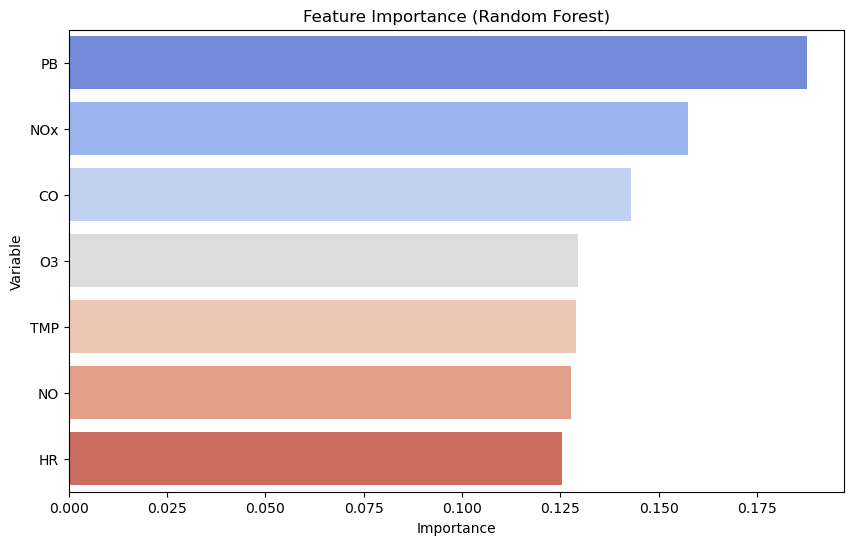

In [26]:
# The R² of 0.35 represents the best achievable performance without including PM2.5 and PM10
# This shows that the other variables (NOx, O3, CO, etc.) have some relationship with air quality, 
# although they are insufficient to fully capture its variability.

# Feature importance
importances = grid_search.best_estimator_.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

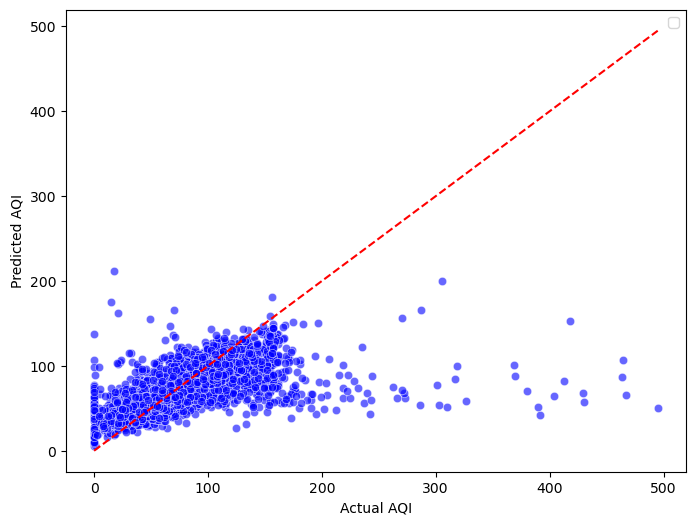

In [27]:
# Visualize the prediction vs reality in a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_grid, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.legend()
plt.show()

#### Segmentation based on air quality

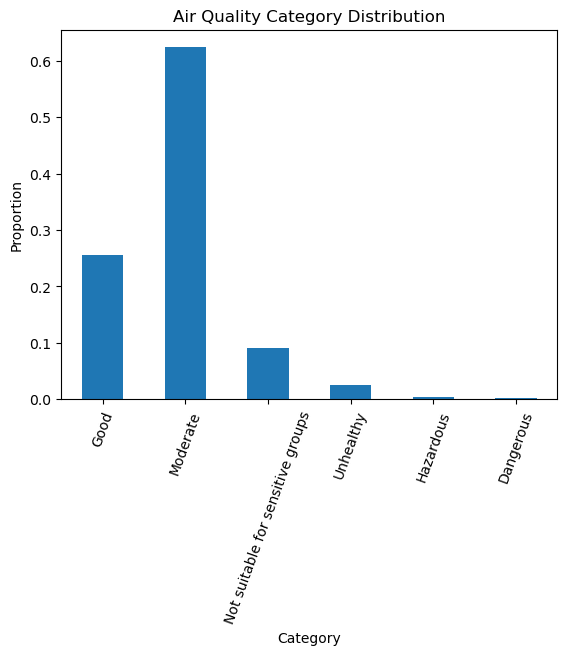

In [28]:
# Define the AQI ranges and categories
aqi_categories = ['Good', 'Moderate', 'Not suitable for sensitive groups', 'Unhealthy', 'Hazardous', 'Dangerous']
aqi_bins = [0, 50, 100, 150, 200, 300, float('inf')]

# Create a new column with AQI categories
df_cleaned['AQI_Category'] = pd.cut(df_cleaned['AQI'], bins=aqi_bins, labels=aqi_categories, include_lowest=True)

# Ensure that the categories have a specific order
df_cleaned['AQI_Category'] = pd.Categorical(df_cleaned['AQI_Category'], categories=aqi_categories, ordered=True)

# Count the data in each category
category_counts = df_cleaned['AQI_Category'].value_counts().sort_index()

# Calculate proportions
category_proportions = category_counts / category_counts.sum()

# Visualize proportions
category_proportions.plot(kind='bar')
plt.title('Air Quality Category Distribution')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=70)
plt.show()

#### Anomaly Detection

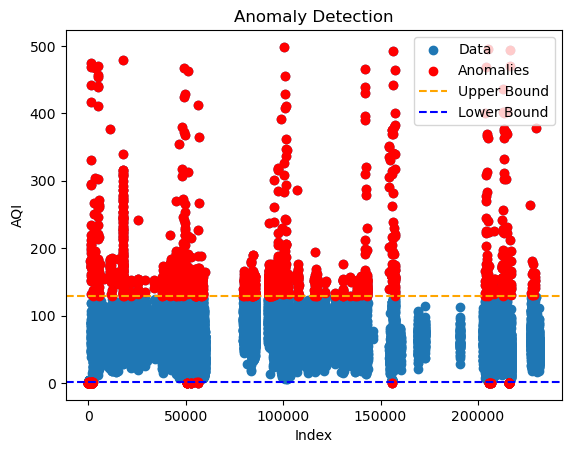

In [29]:
# Calculate quartile statistics
q1 = df_cleaned['AQI'].quantile(0.25)
q3 = df_cleaned['AQI'].quantile(0.75)
iqr = q3 - q1

# Define thresholds to identify outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify anomalies
anomalies = df_cleaned[(df_cleaned['AQI'] < lower_bound) | (df_cleaned['AQI'] > upper_bound)]

# Visualize anomalies in a plot
plt.scatter(df_cleaned.index, df_cleaned['AQI'], label='Data')
plt.scatter(anomalies.index, anomalies['AQI'], color='red', label='Anomalies')
plt.axhline(y=upper_bound, color='orange', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bound, color='blue', linestyle='--', label='Lower Bound')
plt.legend()
plt.title('Anomaly Detection')
plt.xlabel('Index')
plt.ylabel('AQI')
plt.show()

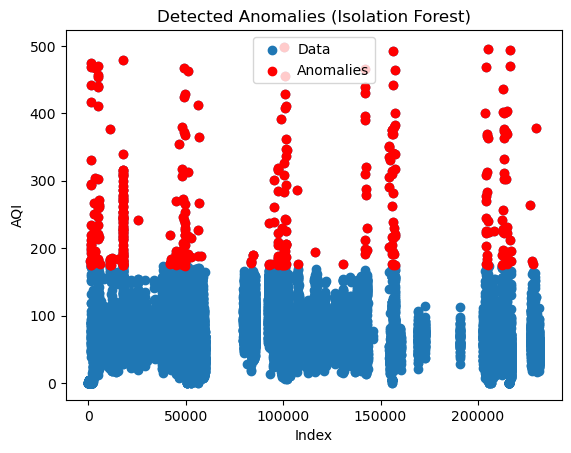

In [30]:
# Identify anomalies using Isolation Forest
from sklearn.ensemble import IsolationForest

# Configure the model
isolation_forest = IsolationForest(contamination=0.01, random_state=3)
df_cleaned['Anomaly'] = isolation_forest.fit_predict(df_cleaned[['AQI']])

# Separating anomalies
anomalies_if = df_cleaned[df_cleaned['Anomaly'] == -1]

# Plot anomalies
plt.scatter(df_cleaned.index, df_cleaned['AQI'], label='Data')
plt.scatter(anomalies_if.index, anomalies_if['AQI'], color='red', label='Anomalies')
plt.title('Detected Anomalies (Isolation Forest)')
plt.xlabel('Index')
plt.ylabel('AQI')
plt.legend()
plt.show()

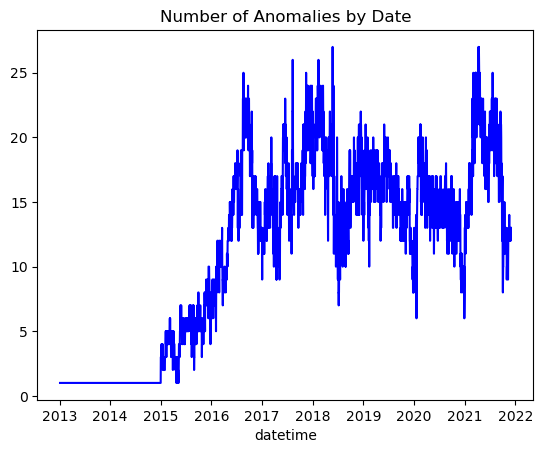

In [32]:
# Visualize anomalies by date (datetime column)
df_cleaned['datetime'] = pd.to_datetime(df_cleaned['datetime'])
anomalies_by_date = df_cleaned[df_cleaned['Anomaly'] == 1].groupby(df_cleaned['datetime'].dt.date).size()
anomalies_by_date.plot(kind='line', color='blue')
plt.title('Number of Anomalies by Date')
plt.show()

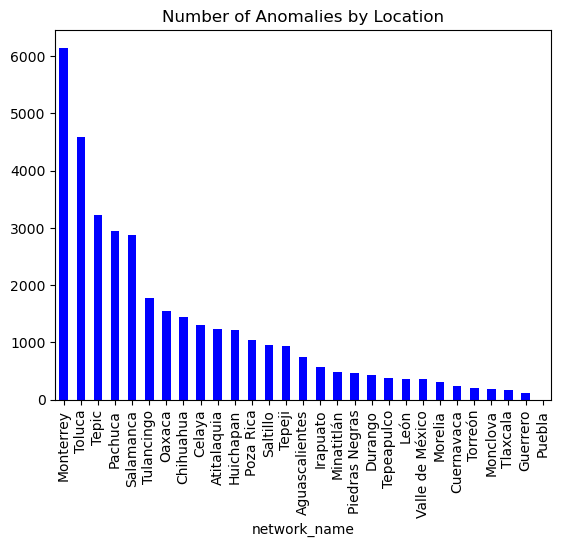

In [33]:
# Visualize number of anomalies by location
anomalies_by_location = df_cleaned[df_cleaned['Anomaly'] == 1].groupby('network_name').size().sort_values(ascending=False)
anomalies_by_location.plot(kind='bar', color='blue')
plt.title('Number of Anomalies by Location')
plt.show()

#### Air Quality Ranking (from lowest to highest AQI)

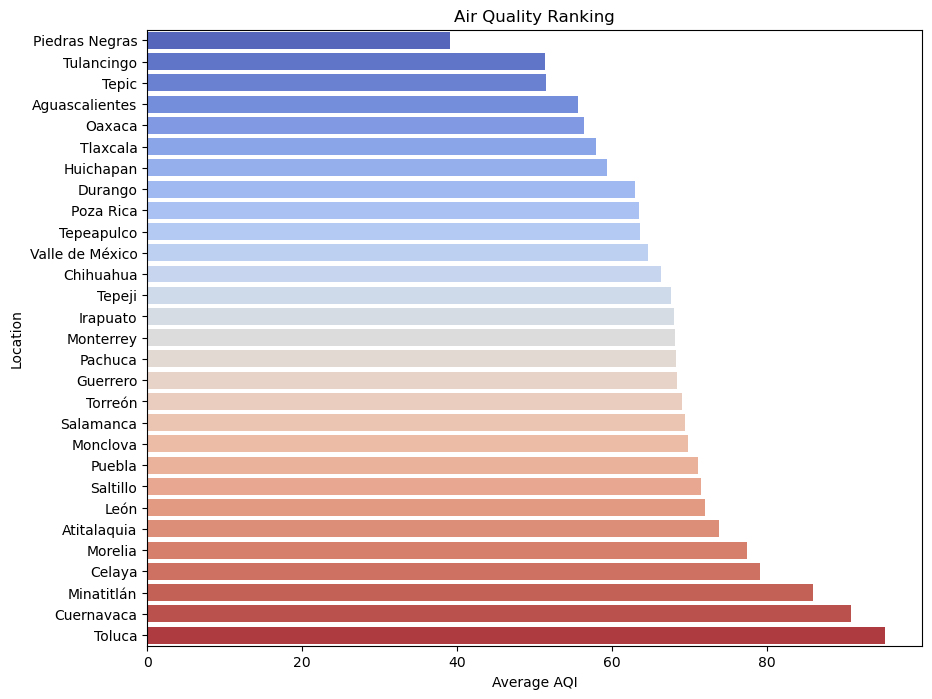

In [34]:
# Calculate the average AQI by 'network_name'
aqi_by_network = df_cleaned.groupby('network_name')['AQI'].mean().sort_values(ascending=True)

# Plot the locations from least to most polluted according to their average AQI
plt.figure(figsize=(10, 8))
sns.barplot(x=aqi_by_network.values, y=aqi_by_network.index, palette='coolwarm')
plt.title('Air Quality Ranking')
plt.xlabel('Average AQI')
plt.ylabel('Location')
plt.show()

In [35]:
# Map to show where AQI is highest

# Create a map centered on the average latitude and longitude of the dataset
center_lat = df_cleaned['lat'].mean()
center_lon = df_cleaned['lon'].mean()
mapa = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Prepare latitude and longitude data for the heatmap
heat_data = [[row['lat'], row['lon'], row['AQI']] for index, row in df_cleaned.iterrows()]

# Create the heatmap
HeatMap(heat_data).add_to(mapa)

# Display the map
mapa